# Data understanding

We will structure this section as follows:
1. [Collect data](#1-collect-data)
2. [Describe data](#2-describe-data)
3. [Initial explore data](#3-initial-explore-data)

The relevant libraries:

In [11]:
import os
import tweepy as tw
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import credentials as cr

plt.style.use('ggplot')

## 1. Collect data

The first thing we will do is to establish the credentials and connection with the twitter api. When we talk about "the credentials" we mean those access keys to the twitter developer account:

In [ ]:
#Add your credentials here
twitter_keys = {
  'consumer_key': cr.api_key,
  'consumer_secret': cr.api_secret_key,
  'access_token_key': cr.acces_token,
  'access_token_secret': cr.acces_token_secret   
}

#Setup access to API
auth = tw.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

# setting the connection with the API
api = tw.API(auth, wait_on_rate_limit=True)

The second step will be to establish two functions: The first will allow us to download, in the form of a list, the recents tweets. Filters have been made to delimit tweets related to Medellin and keywords. The second function will allow us to convert the list downloaded by the previous function into a dataframe.

In [ ]:
def making_the_query(search_query):

  '''
  recieve one parameter, the key word that we will use to filter the request 
  and returns a list with all the fetched tweets 
  '''
  query = search_query + ' medellin -filter:retweets' 
  date_since = "2018-11-16"  # date filter to search the tweets

  tweets = tw.Cursor(api.search_tweets,
                    q=query,
                    lang="es",
                    since=date_since,
                    tweet_mode="extended").items(2)

  list_of_tweets = [[tweet.full_text, 
                    tweet.user.screen_name, 
                    tweet.user.location,
                    tweet.created_at,
                    tweet.id,
                    tweet.retweet_count,
                    tweet.favorite_count] for tweet in tweets]
  
  return list_of_tweets

In [ ]:
def create_the_df(list_of_tweets):

  '''
  Recieve one parameter, the list with all the tweets and return a dataFrame
  '''

  # creating the dic to fill with the tweets that we fetch
  diccionario = {
      'texto':[],
      'usuario':[],
      'ubicacion':[],
      'fecha':[],
      'tweet_id':[],
      'numero_rt':[],
      'numero_likes':[]
  }

  count = 0
  dict_to_fill = diccionario.copy()

  for row in range(len(list_of_tweets)):
    
    # agregando los datos al diccionario
    dict_to_fill['texto'].append(list_of_tweets[row][0])
    dict_to_fill['usuario'].append(list_of_tweets[row][1])
    dict_to_fill['ubicacion'].append(list_of_tweets[row][2])
    dict_to_fill['fecha'].append(list_of_tweets[row][3])
    dict_to_fill['tweet_id'].append(list_of_tweets[row][4])
    dict_to_fill['numero_rt'].append(list_of_tweets[row][5])
    dict_to_fill['numero_likes'].append(list_of_tweets[row][6])

  df = pd.DataFrame.from_dict(dict_to_fill)

  return df

Once the key functions have been established, we will proceed to create a list of keywords extracted from the Medellin development plan, oriented to the line of the plan to be measured. The data will be saved in a csv file for later description and exploration.

In [ ]:
# palabras claves seleccionadas para realizar la busqueda
palabras_claves = [
                   '"movilidad sostenible"', '"movilidad inteligente"', '"servicios publicos"',
                   '"energias alternativas"', '"reciclaje"', '"energias renovables"',
                   '"urbanimo ecologico"', '"urbanismo"', '"desarrollo rural"',
                   '"bienestar animal"', '"biodiversidad"', '"energias limpias"',
                   '"movilidad"','"reciclar"', '"energias"', '"rural"',
]

count = 0

# creando una consulta para cada palabra clave
for search_query in palabras_claves:

  list_of_tweets = making_the_query(search_query)
  df = create_the_df(list_of_tweets)
  # creando una nueva columna con la palabra clave
  df['palabra_clave'] = search_query.replace('"','')

  if count == 0:
    df_final = df.copy()
    count = 1
  else:
    df_final = df_final.append(df, ignore_index=True)

In [ ]:
df_final

In [ ]:
df_final.to_csv('data.csv')

## 2. Describe data

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head(20)

,Unnamed: 0,texto,usuario,ubicacion,fecha,tweet_id,numero_rt,numero_likes,palabra_clave
0,0,📢¡ @Hydrometra11 abre convocatoria para nuevos...,fminas,Medellín - Colombia,2022-05-21 18:30:00+00:00,1.528081e+18,2.0,3.0,movilidad sostenible
1,1,Faltan días para dar inicio a nuestras giras p...,LatamGreen,Panama,2022-05-21 01:29:49+00:00,1.527824e+18,0.0,5.0,movilidad sostenible
2,2,"@QuinteroCalle Desde su llegada claro que sí, ...",CegamaL7,"Medellín, Antioquia",2022-05-21 12:31:25+00:00,1.527990e+18,0.0,2.0,servicios publicos
3,3,@SantiagoSernaOs @petrogustavo Le están pidien...,SORAGAME13,NaN,2022-05-21 01:24:14+00:00,1.527823e+18,0.0,0.0,servicios publicos
4,4,🔴#SeñalDeLaMañana | La Alcaldía de Medellín in...,RadNalCo,"Bogotá, Colombia",2022-05-18 13:52:05+00:00,1.526924e+18,0.0,1.0,reciclaje
5,5,Está mañana en el Centro de Medellín estaban e...,mpaulina12,NaN,2022-05-17 21:25:25+00:00,1.526675e+18,0.0,1.0,reciclaje
6,6,@carpmede @JohnMiltonFaja2 @QuinteroCalle Es q...,DanielEsPareja,"Antioquia, Colombia",2022-05-21 21:15:20+00:00,1.528122e+18,0.0,0.0,urbanismo
7,7,El caso de Medellín es un caso de Urbanismo SU...,FerchoMaidana,Paraguay,2022-05-20 20:36:19+00:00,1.527750e+18,2.0,7.0,urbanismo
8,8,"#ACTUALIDAD || En 2020, Iván Duque lo integró ...",diariocriterio,"Bogotá, D.C., Colombia",2022-05-16 02:40:00+00:00,1.526030e+18,6.0,5.0,desarrollo rural
9,9,"@FicoGutierrez La gente habla por hablar, most...",LoMejorDeLos80s,NaN,2022-05-18 00:01:08+00:00,1.526714e+18,0.0,0.0,bienestar animal


In [7]:
df.columns

Index(['Unnamed: 0', 'texto', 'usuario', 'ubicacion', 'fecha', 'tweet_id',
       'numero_rt', 'numero_likes', 'palabra_clave'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19 non-null     int64  
 1   texto          19 non-null     object 
 2   usuario        19 non-null     object 
 3   ubicacion      15 non-null     object 
 4   fecha          19 non-null     object 
 5   tweet_id       19 non-null     float64
 6   numero_rt      19 non-null     float64
 7   numero_likes   19 non-null     float64
 8   palabra_clave  19 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ KB


In [10]:
df.describe()

,Unnamed: 0,tweet_id,numero_rt,numero_likes
count,19.000000,1.900000e+01,19.000000,19.000000
mean,9.000000,1.527308e+18,0.789474,2.263158
std,5.627314,8.472991e+14,1.583910,2.353298
min,0.000000,1.525823e+18,0.000000,0.000000
25%,4.500000,1.526699e+18,0.000000,0.000000
50%,9.000000,1.527750e+18,0.000000,1.000000
75%,13.500000,1.528094e+18,1.000000,4.500000
max,18.000000,1.528166e+18,6.000000,7.000000


## 3. Initial explore data

<AxesSubplot:>

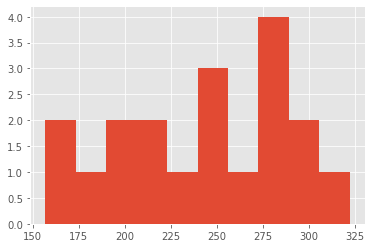

In [20]:
df['texto'].str.len().hist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


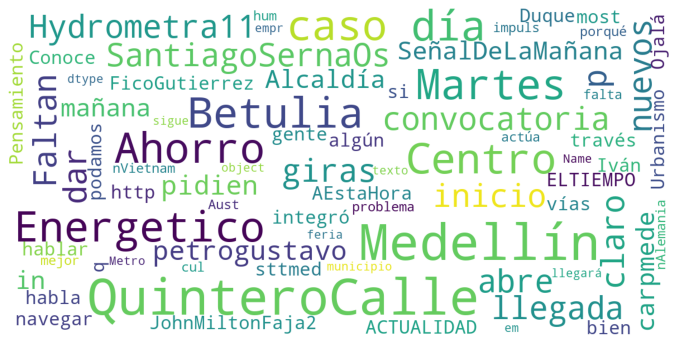

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from wordcloud import WordCloud
stopwords = set(stopwords.words('spanish', 'english'))
text=df['texto']
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(text))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Medellín - Colombia'),
  Text(1, 0, 'Panama'),
  Text(2, 0, 'Medellín, Antioquia'),
  Text(3, 0, 'Bogotá, Colombia'),
  Text(4, 0, 'Antioquia, Colombia'),
  Text(5, 0, 'Paraguay'),
  Text(6, 0, 'Bogotá, D.C., Colombia'),
  Text(7, 0, 'Medellín, Antioquia, Cologmbia'),
  Text(8, 0, 'Medellín-Colombia'),
  Text(9, 0, 'Medellín, Colombia'),
  Text(10, 0, 'Bogotá-Colombia'),
  Text(11, 0, 'Medellin')])

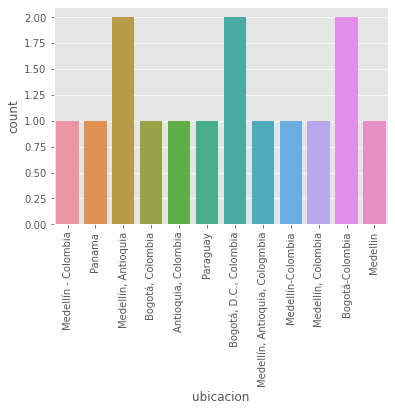

In [17]:
sns.countplot(data=df,x='ubicacion')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2022-05-21 18:30:00+00:00'),
  Text(1, 0, '2022-05-21 01:29:49+00:00'),
  Text(2, 0, '2022-05-21 12:31:25+00:00'),
  Text(3, 0, '2022-05-21 01:24:14+00:00'),
  Text(4, 0, '2022-05-18 13:52:05+00:00'),
  Text(5, 0, '2022-05-17 21:25:25+00:00'),
  Text(6, 0, '2022-05-21 21:15:20+00:00'),
  Text(7, 0, '2022-05-20 20:36:19+00:00'),
  Text(8, 0, '2022-05-16 02:40:00+00:00'),
  Text(9, 0, '2022-05-18 00:01:08+00:00'),
  Text(10, 0, '2022-05-19 15:04:58+00:00'),
  Text(11, 0, '2022-05-15 13:06:48+00:00'),
  Text(12, 0, '2022-05-21 22:00:07+00:00'),
  Text(13, 0, '2022-05-21 20:14:30+00:00'),
  Text(14, 0, '2022-05-18 00:00:29+00:00'),
  Text(15, 0, '2022-05-17 22:00:44+00:00'),
  Text(16, 0, '2022-05-15 12:59:53+00:00'),
  Text(17, 0, '2022-05-22 00:08:50+00:00'),
  Text(18, 0, '2022-05-22 00:05:00+00:00')])

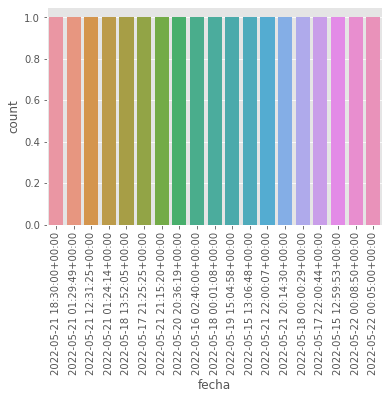

In [18]:
sns.countplot(data=df,x='fecha')
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='numero_rt', ylabel='count'>

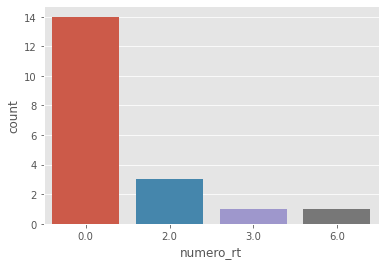

In [13]:
sns.countplot(data=df,x='numero_rt')

<AxesSubplot:xlabel='numero_likes', ylabel='count'>

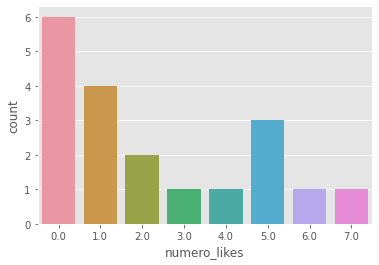

In [14]:
sns.countplot(data=df,x='numero_likes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'movilidad sostenible'),
  Text(1, 0, 'servicios publicos'),
  Text(2, 0, 'reciclaje'),
  Text(3, 0, 'urbanismo'),
  Text(4, 0, 'desarrollo rural'),
  Text(5, 0, 'bienestar animal'),
  Text(6, 0, 'biodiversidad'),
  Text(7, 0, 'movilidad'),
  Text(8, 0, 'reciclar'),
  Text(9, 0, 'energias'),
  Text(10, 0, 'rural')])

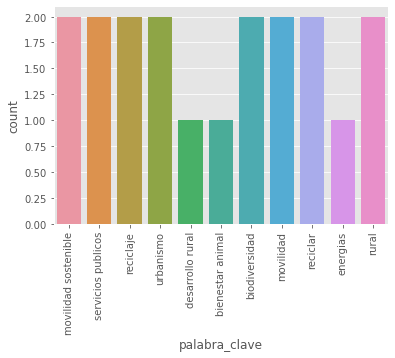

In [19]:
sns.countplot(data=df,x='palabra_clave')
plt.xticks(rotation = 90)